In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

import os

import cv2

from tensorflow.keras.models import load_model

C:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from utils import *

In [3]:
with open("model_utils.pkl","rb") as f:
    metadata, embeddings, pipeline, le = pickle.load(f)

In [4]:
vgg_face_embedder = load_model("vgg_face_embedder.h5")

In [9]:
test_img_path = r"D:\Users\DELL\Desktop\Major Project\Github Face Rec\test_images\chris_pratt.jpeg"

In [10]:
recognize_face(test_img_path, vgg_face_embedder, pipeline, le)

'Chris Pratt'

In [11]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [12]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (15545,2622)
y_train shape : (15545,)
X_test shape : (1944,2622)
y_test shape : (1944,)


In [13]:
y_test[0], y_train[988]

('pins_Tom Hardy', 'pins_Rihanna')

In [14]:
len(np.unique(y_test)), len(np.unique(y_train))

(105, 105)

In [15]:
y_predict = pipeline.predict(X_test)

In [16]:
y_test_encoded = le.transform(y_test)

In [17]:
y_predict_encoded = le.inverse_transform(y_predict)

In [18]:
accuracy_score(y_test_encoded, y_predict)

0.9665637860082305

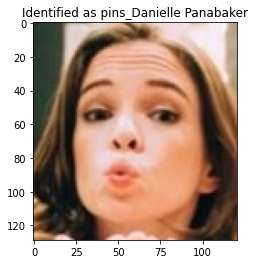

In [19]:
example_idx = 401

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

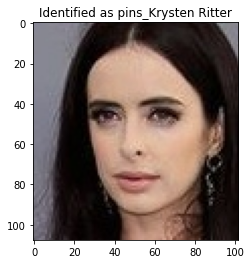

In [20]:
example_idx = 243

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

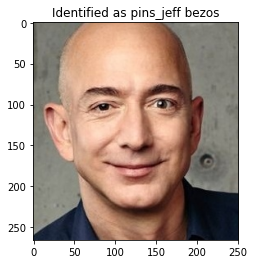

In [21]:
example_idx = 317

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] 
example_identity =  y_predict_encoded[example_idx] 

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

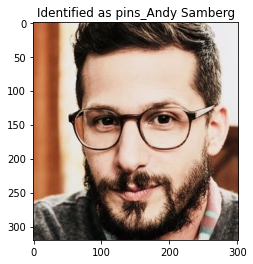

In [22]:
example_idx = -27

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');